# Importing data from Excel file

In [3]:
import pandas as pd
from pathlib import Path
excel_path = Path('data/sales.xlsx')

In [5]:
sales = pd.read_excel(excel_path)

In [7]:
sales = pd.read_excel(excel_path, sheet_name='sales', header=None)

In [45]:
# to save this xlsx file to csv file
sales.to_csv('sales2.csv')
sales.to_excel('sales2.csv')

# Cleaning Data

### File Inspection / Handling inconsistent Data

In [53]:
csv_path = Path('data/titanic.csv')
titanic = pd.read_csv(csv_path)

In [55]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [59]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [114]:
titanic.describe(include = 'O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [67]:
titanic[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe()
# when there will be missing data, it will top up

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
titanic.Survived.unique()  # we have 0s and 1s

array([0, 1], dtype=int64)

In [71]:
titanic.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [77]:
titanic.Survived.replace(to_replace=["yes", "no"], value=[1, 0], inplace=True)
# new version
titanic['Survived'] = titanic['Survived'].replace(to_replace=['yes', 'no'], value=[1, 0])

C:\Users\khali\AppData\Local\Temp\ipykernel_2816\2966562429.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.Survived.replace(to_replace=["yes", "no"], value=[1, 0], inplace=True)


In [79]:
titanic.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Olympic Dataset

In [82]:
csv_path = Path('data/summer.csv')
summer = pd.read_csv(csv_path)

In [84]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [86]:
summer.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [88]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [92]:
summer.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [98]:
summer[['City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender']].describe()

,City,Sport,Discipline,Athlete,Country,Gender
count,31165,31165,31165,31165,31161,31165
unique,22,43,67,22762,147,2
top,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men
freq,3567,4170,3638,22,4585,22746


In [100]:
# changing the name of a column
summer.rename(columns={'Athlete': 'Athlete_Name'}, inplace=True)

In [102]:
summer.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [104]:
summer.Medal.value_counts()

Medal
Gold      10486
Bronze    10369
Silver    10310
Name: count, dtype: int64

In [106]:
# summer.Medal.replace(to_replace='Gold Medal', value='Gold', inplace=True)

In [112]:
summer.iloc[:, 1:].describe()

,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
count,31165,31165,31165,31165,31161,31165,31165,31165
unique,22,43,67,22762,147,2,666,3
top,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,3567,4170,3638,22,4585,22746,1497,10486


# String Operations

In [119]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [125]:
pd.to_numeric(titanic.Fare)
# when these is a string like $75.0 pandas cant recognize this
titanic.Fare.str.replace('$', '')

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [139]:
summer.Athlete_Name.str.title() # here it capitilized their name to be more consice
summer.Athlete_Name.str.strip()
summer.loc[summer.Athlete_Name == 'PHELPS, Michael'].head(3)

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
25225,2004,Athens,Aquatics,Swimming,"PHELPS, Michael",USA,Men,100M Butterfly,Gold
25253,2004,Athens,Aquatics,Swimming,"PHELPS, Michael",USA,Men,200M Butterfly,Gold
25258,2004,Athens,Aquatics,Swimming,"PHELPS, Michael",USA,Men,200M Freestyle,Bronze


## pd.to_numeric   .astype(datatype)

In [170]:
pd.to_numeric(titanic.Fare)
titanic.Fare.astype('float')
titanic['Fare'] = titanic.Fare.astype('float')
titanic['Survived'] = titanic.Survived.astype('int')
titanic['Age'] = titanic.Age.astype('float')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 80.2+ KB


# NA values Detection

In [177]:
# ... = None or ... = np.nan

In [179]:
titanic.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [181]:
titanic.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [183]:
titanic.isna().any(axis=0)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [185]:
titanic[titanic.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [187]:
titanic.notna()   # oposite for isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,False,True
887,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,True,True,False,True,True,True,True,False,True
889,True,True,True,True,True,True,True,True,True,True,True,True


In [189]:
titanic.notna().sum(axis=0)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [191]:
titanic.notna().all(axis=0)

PassengerId     True
Survived        True
Pclass          True
Name            True
Sex             True
Age            False
SibSp           True
Parch           True
Ticket          True
Fare            True
Cabin          False
Embarked       False
dtype: bool

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Axes: >

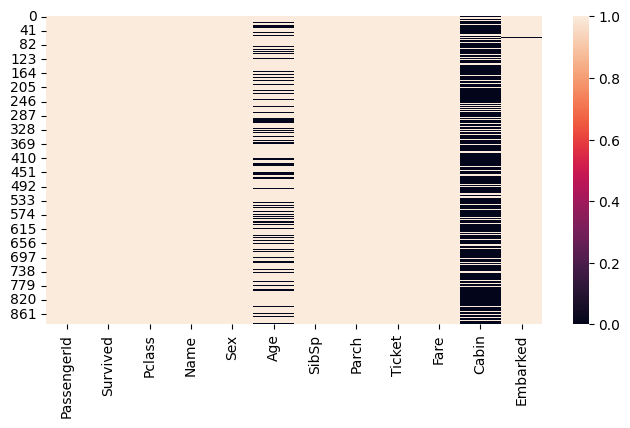

In [204]:
plt.figure(figsize = (8, 4))
sns.heatmap(titanic.notna())

In [209]:
titanic.Age.value_counts(dropna = False)

Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [217]:
titanic['Age'] = titanic['Age'].replace(to_replace="Missing Data", value=np.nan)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 80.2+ KB


# Removing Missing Values

In [221]:
titanic.Age.value_counts(dropna=False)

Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [227]:
# we still can get actual results by skipping the NAs
titanic.Age.mean(skipna=True)

29.69911764705882

In [229]:
titanic.shape

(891, 12)

In [233]:
# this will delete all rows which contain NAs
titanic.dropna().shape # now we have this shape
# this approach is not good because for better analysis, as much data is simply deleted

(183, 12)

In [235]:
# delete all rows, if there is even one NA in cell
titanic.dropna(axis = 0, how='any').shape 

(183, 12)

In [237]:
# delete entire columns if there is NA
titanic.dropna(axis = 1, how='any').shape

(891, 9)

In [239]:
titanic.dropna(axis=0, how='all').shape

(891, 12)

In [241]:
titanic.dropna(axis=1, how='all').shape

(891, 12)

In [247]:
# delete all rows, dont delete if in rows there are 8 notNA values
titanic.dropna(axis=0, thresh=8).shape
titanic.dropna(axis=1, thresh=500).shape
# if there is a column with more than 500 notNA keep it, else delete that row
titanic.dropna(axis=1, thresh=500, inplace=True)

In [251]:
titanic.head()
titanic.shape

(891, 11)

In [263]:
titanic.dropna(axis=0, subset=['Survived', 'Pclass', 'Sex', 'Age'], how = 'any').shape
# here we dont need to have NAs so we dont accept any missing values. we delete them

(714, 11)

# Replacing Missing Values with fillna()

In [288]:
titanic.Age.mean(skipna=True)

29.69911764705882

In [294]:
mean = round(titanic.Age.mean(skipna=True), 1)
mean

29.7

In [300]:
titanic['Age'] = titanic['Age'].fillna(mean)

In [302]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [314]:
most_freq = titanic['Cabin'].value_counts().idxmax()

In [322]:
titanic['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [324]:
titanic['Cabin'] = titanic['Cabin'].fillna(most_freq)

In [326]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Detection of Duplicates

In [355]:
titanic.duplicated(keep = 'first').sum()
titanic[titanic.duplicated(keep = 'first')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [351]:
summer.duplicated(keep = 'first').sum()

2

In [345]:
summer[summer.duplicated(keep = 'first')]
# it won't show the first occurance but rest

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
16099,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
29785,2012,London,Badminton,Badminton,"ZHAO, Yunlei",CHN,Women,Doubles,Gold


### Handling / Removing Duplicates

In [372]:
summer.duplicated().sum()
summer[summer.duplicated()]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal


In [370]:
# 1 method to remove duplicates:
summer.drop(index = [16099, 29785], inplace = True)

In [376]:
# 2 method to remove duplicates:
summer.drop_duplicates(inplace = True)

1. Data Inspection
Goal: Understand the structure, size, and patterns in the dataset.
Actions:
Use .head(), .info(), and .describe() to inspect the data.
Check for missing values with .isnull().sum() and visualize trends with basic plots (e.g., line plots).
2. Data Cleaning
Goal: Ensure data is ready for modeling.
Actions:
Handle missing values (fill or remove) using .fillna() or .dropna().
Ensure the data has consistent frequency (e.g., daily, monthly).
Remove duplicates using .drop_duplicates().
3. Set Time as Index
Goal: Convert your dataset into a time-series format.
Actions:
Convert the time column to datetime using pd.to_datetime().
Set the time column as the DataFrame index using .set_index().
4. Exploratory Data Analysis (EDA)
Goal: Identify patterns like trends, seasonality, and outliers.
Actions:
Plot the data using Matplotlib or Seaborn to observe trends.
Use .rolling() to calculate and plot rolling means (to see trends).
Decompose the time series into trend, seasonality, and residuals using seasonal_decompose (from statsmodels).
5. Check for Stationarity
Goal: Ensure the data is stationary (constant mean and variance over time).
Actions:
Use a rolling mean/variance or Dickey-Fuller Test to check stationarity.
If not stationary, apply transformations (e.g., differencing or log transformations).
6. Train-Test Split
Goal: Split the data for validation.
Actions:
Divide the data into training and testing sets (e.g., last 20% for testing).
Use slicing like train = data[:-n] and test = data[-n:].
7. Choose a Forecasting Model
Goal: Select and implement an appropriate model.
Models:
ARIMA: Good for trend and seasonality after differencing.
Holt-Winters: Works well for seasonal data.
Prophet: A simple-to-use model for trends and seasonality (optional).
Actions:
Fit the model to the training data.
Use .fit() and .forecast() or .predict() methods for predictions.
8. Evaluate the Model
Goal: Measure the accuracy of the forecast.
Actions:
Compare predictions to the actual values from the test set.
Calculate metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or Mean Absolute Percentage Error (MAPE).
9. Visualize the Results
Goal: Present insights clearly.
Actions:
Plot the original data along with the forecasted values.
Highlight key trends, predictions, and intervals.
10. Interpret and Report
Goal: Summarize findings and implications.
Actions:
Interpret the model results (e.g., what the forecast indicates).
Note limitations or assumptions.

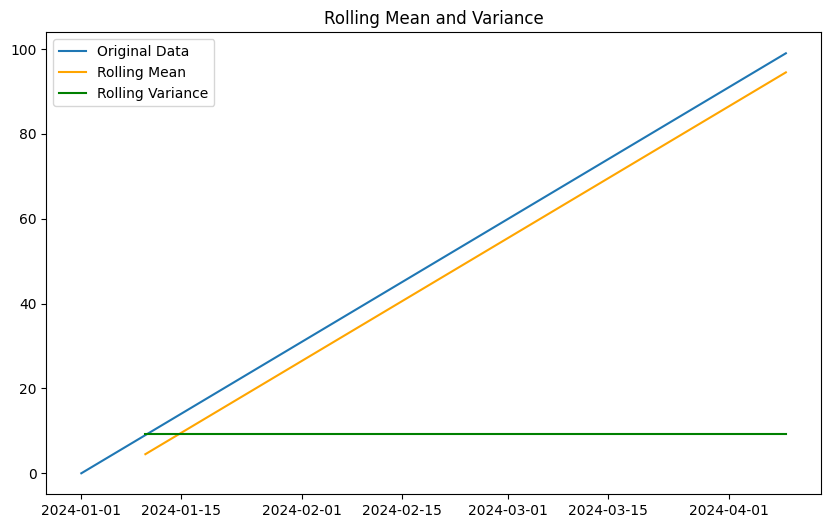

In [379]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Time-series data
data = {'Date': pd.date_range(start='2024-01-01', periods=100, freq='D'),
        'Value': range(100)}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Rolling mean and variance
rolling_mean = df['Value'].rolling(window=10).mean()
rolling_var = df['Value'].rolling(window=10).var()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_var, label='Rolling Variance', color='green')
plt.legend()
plt.title('Rolling Mean and Variance')
plt.show()